In [85]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import ndimage
import mp1_config

In [94]:
# Initialization of paths

path = "./Data"
runs = [os.path.join(path, run) for run in os.listdir(path)]

def retrieve_data(file_to_use) : 
    data = np.loadtxt(file_to_use)
    wavelength = data[:,0]
    even = data[:,1]
    uneven = data[:,2]
    diff = uneven - even

    return (wavelength, diff, even, uneven)

def retrieve_files(run_to_use) : 
    global runs
        
    files = [os.path.join(runs[run_to_use], dat) for dat in os.listdir(runs[run_to_use])]

    return files 

def analyze_files(run_to_use) : 

    files = retrieve_files(run_to_use)
    all_wls, all_diffs, all_even, all_uneven = [], [], [], []
    for file in files :
        wl, diff, even, uneven = retrieve_data(file)
        all_wls.append(wl)
        all_diffs.append(diff)
        all_even.append(even)
        all_uneven.append(uneven)
    
    identical = all(np.array_equal(all_wls[0], arr) for arr in all_wls)
    if not identical : UserWarning("Wavelength bins are not identical")
    
    avg_diff = np.average(all_diffs, axis=0)
    avg_even = np.average(all_even, axis=0)
    avg_uneven = np.average(all_uneven, axis=0)

    return (all_wls[0], avg_diff, avg_even, avg_uneven)

files = retrieve_files(0)
print(files)

['./Data\\20250321_run04\\raw001.DAT', './Data\\20250321_run04\\raw002.DAT', './Data\\20250321_run04\\raw003.DAT', './Data\\20250321_run04\\raw004.DAT', './Data\\20250321_run04\\raw005.DAT', './Data\\20250321_run04\\raw006.DAT', './Data\\20250321_run04\\raw007.DAT', './Data\\20250321_run04\\raw008.DAT', './Data\\20250321_run04\\raw009.DAT', './Data\\20250321_run04\\raw010.DAT', './Data\\20250321_run04\\raw011.DAT', './Data\\20250321_run04\\raw012.DAT', './Data\\20250321_run04\\raw013.DAT', './Data\\20250321_run04\\raw014.DAT', './Data\\20250321_run04\\raw015.DAT', './Data\\20250321_run04\\raw016.DAT', './Data\\20250321_run04\\raw017.DAT', './Data\\20250321_run04\\raw018.DAT', './Data\\20250321_run04\\raw019.DAT', './Data\\20250321_run04\\raw020.DAT', './Data\\20250321_run04\\raw021.DAT', './Data\\20250321_run04\\raw022.DAT', './Data\\20250321_run04\\raw023.DAT', './Data\\20250321_run04\\raw024.DAT', './Data\\20250321_run04\\raw025.DAT', './Data\\20250321_run04\\raw026.DAT', './Data\\20

Text(0, 0.5, 'Counts')

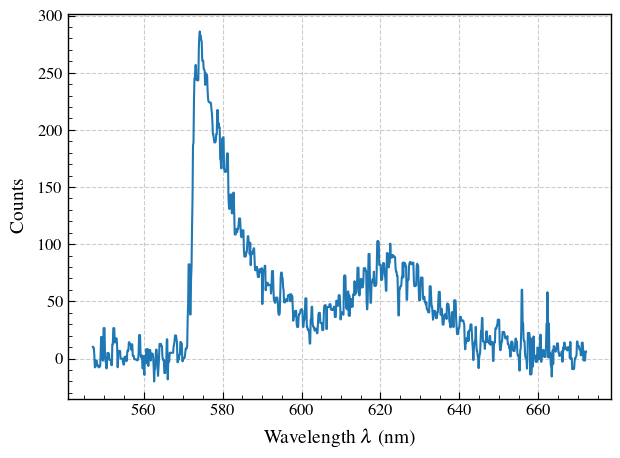

In [92]:
wl, avg_diff, avg_even, avg_uneven = analyze_files(0)

avg_diff_filter = ndimage.median_filter(avg_diff, size=4)

rows, cols = 1, 1
vsize, hsize = 5, 7
fig, ax = plt.subplots(rows, cols, figsize=(cols*hsize, rows*vsize))

ax.plot(wl, avg_diff_filter)
ax.grid(alpha=0.4)
ax.set_xlabel("Wavelength $\lambda$ (nm)")
ax.set_ylabel("Counts")

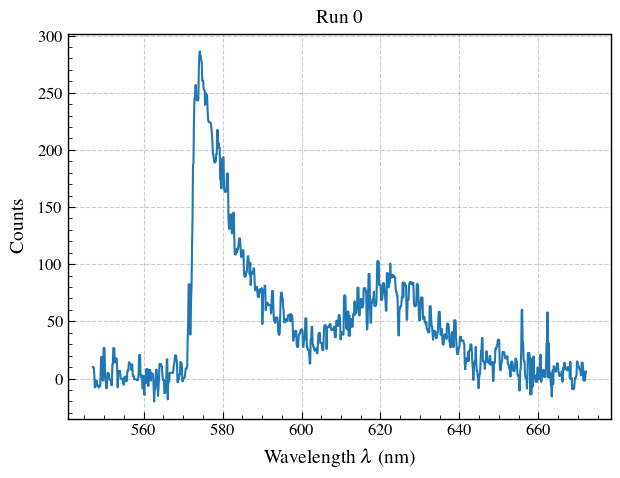

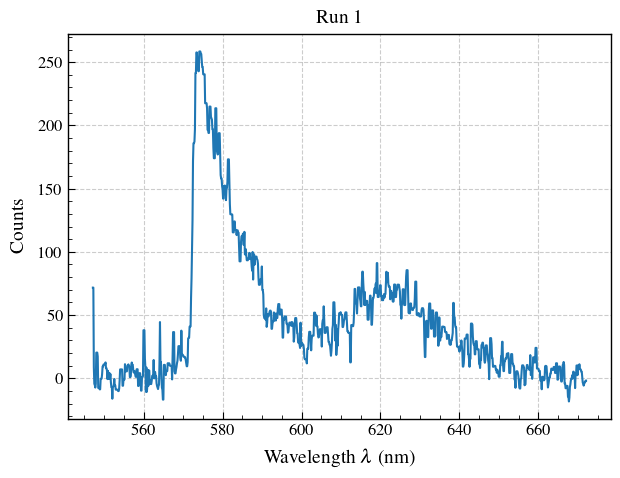

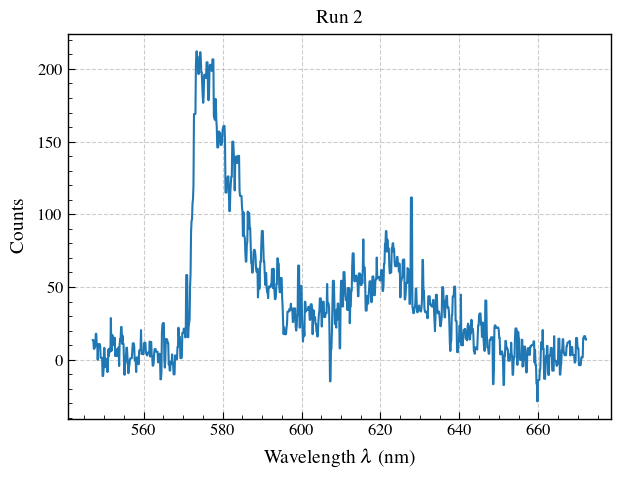

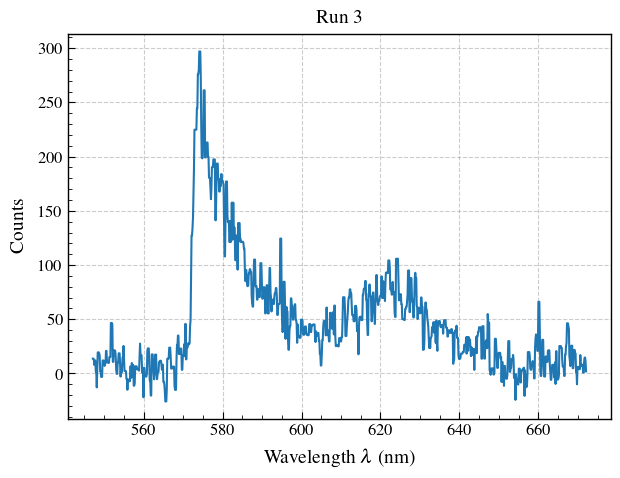

In [ ]:
for i in np.arange(0,len(runs),1) : 
    
    wl, avg_diff, avg_even, avg_uneven = analyze_files(i)

    avg_diff_filter = ndimage.median_filter(avg_diff, size=4)

    rows, cols = 1, 1
    vsize, hsize = 5, 7
    fig, ax = plt.subplots(rows, cols, figsize=(cols*hsize, rows*vsize))

    ax.plot(wl, avg_diff_filter)
    ax.set_title(f"Run {i}")
    ax.grid(alpha=0.4)
    ax.set_xlabel("Wavelength $\lambda$ (nm)")
    ax.set_ylabel("Counts")